# 4.9: Intro to Data Visualization with Python

#### Create basic data visualization in Python
#### Cerate representative data samples to avoid memory errors when executing code

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Dataframe

In [3]:
# Creating path

path = r'/Users/david/Desktop/CF/Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/07-2022 Instacart Basket Analysis'

In [4]:
# Check 'path'

path

'/Users/david/Desktop/CF/Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/07-2022 Instacart Basket Analysis'

In [7]:
# Import 'ords_prods_merge_26_07.pkl' data set as 'ords_prods_merge' dataframe

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '26_07_22', 'ords_prods_merge_26_07.pkl'))

In [8]:
# Check 'ords_prods_merge' shape

ords_prods_merge.shape

(32404859, 25)

## Creating Bar Charts

#### Categorical variables
#### Bar charts to determine how the observations in data set (datframe) are distributed among the categories of a variable.

<AxesSubplot:>

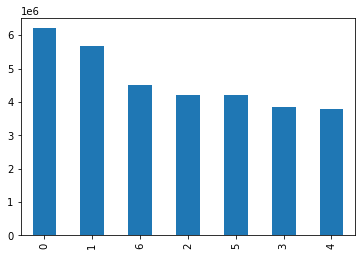

In [11]:
# Create a bar chart for 'orders_day_of_week' column 

ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

#### Column attached to the dataframe's name,
#### after the dot, come the function to be executed: 'value_counts()',
#### after the last fucntion, an additional function comes in: plot/bar()
#### This tells Python to find the 'bar()' function within the 'plot' module, which will create the actual bar chart

#### Ensure to always run a frequency of the column ('value_counts()'), otherwise, it could take considerable time to produce chart

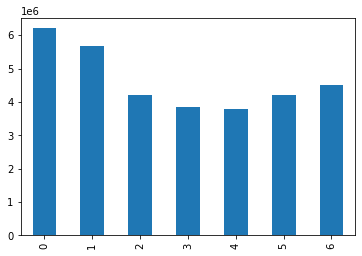

In [12]:
# If the largest-to-smalles order is not wanted, the 'dort_index()' funciton helps to sort bars according to their index order

bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

#### The 'sort_index()' function can also be used when printing frequencies


In [13]:
# Print 'order_day_of_week' frequencies by size order
ords_prods_merge['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [14]:
# Print'order_day_of_week' frequencies by index rder
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

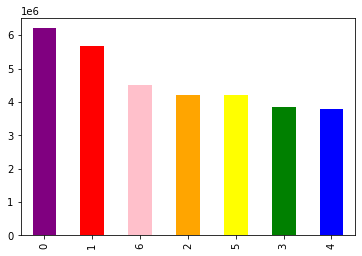

In [16]:
# Adding color to the bars by adding a 'color' argument in 'plot.bar()' function, and listing the colors in a custom list

bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### Whcih other arguments can be added to the 'plot.bar()' function?

## Exporting Charts

#### The code above generated a preview for the visualization but it's not actually saved in Jupyter's memory. Update command to change this

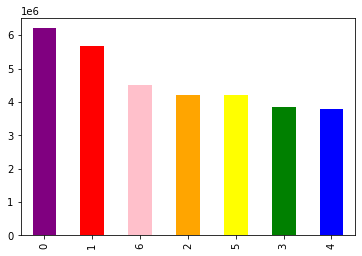

In [18]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### The bar chart has been saved wothin the 'bar' object, which can be accessed by calling 'bar.figure'

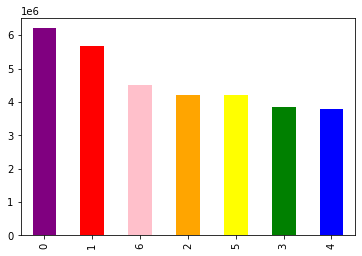

In [19]:
bar.figure

#### Export it outside of Jupyter can be done via the 'figure.savefig()' function

In [20]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '27_07_22', 'bar_ords_dow.png'))

#### tHe above command access the 'figure' within the 'bar' object and applies 'savefig()' function to it, whcih is what saves the figure to a file

## Creating Histograms and Scatterplots

### Histograms

#### Histograms are used to show the density of a continuous variable--the distribution of observation pero their occurence in data set. Histograms are more for continuous data.

<AxesSubplot:ylabel='Frequency'>

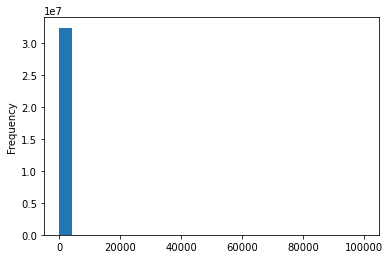

In [21]:
# Histogram of the 'prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

# It is in esence the same syntax as for the bar chart, but changin 'bar()' by 'hist()'
# Also, the 'hist()' argument 'bins = 25' is to determine the granularity of the histogram.

#### Apparently there's a single bar in this histogram, but in reality are two bars: The big one, all the 'small' values are contained, and one that's nor visible containing the price '99,999.00'. 
#### Thismeans the data is not consistent as when 'ords_prods_merge['prices'].describe()' it's runned, the mean (11.98) and the median (7.4) are considearbly smaller than the maximum number (99,999.00)

### Scatterplots

#### Scatterplots can be used to conduct exploratory analysis (not only to investigate the relationship between variables). A scatterplot to explor the data can hel to visualiuze the data point distribution in order to identify any outliers

<AxesSubplot:xlabel='prices', ylabel='prices'>

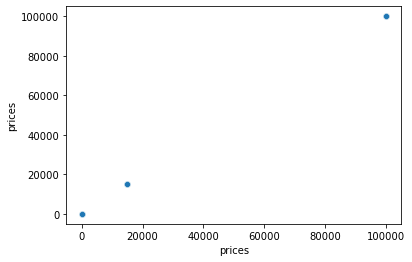

In [22]:
# Scatterplot for 'prices' column against itself to reveal outliers.

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

#### Scatterplots can be created with 'scatterplot()' fucntion included in the seaborn (sns) library.
#### Most of the values in 'prices' are around it's mean, but the scatterplot shows values around the 20,000 and 100,000. So it's woth to run a few more exploratory checks.

In [23]:
# Determine whether there are any values above the threshold in the data, anything above normal price of a supermarket item.

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_expenditure,expenditure_flag,purchase_frequency,frequency_flag,Frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Intermediately busy days,Most orders,40,Regular customer,108.648299,High Spender,5.00000,NaN,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Intermediately busy days,Most orders,40,Regular customer,108.648299,High Spender,5.00000,NaN,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Intermediately busy days,Average orders,4,New customer,1154.792308,High Spender,11.55742,Regular Customer,NaN
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High Spender,11.55742,Regular Customer,NaN
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,20.00000,Regular Customer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.00000,NaN,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High Spender,4.00000,NaN,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High Spender,5.00000,NaN,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High Spender,11.11484,Regular Customer,NaN


#### Odd values (14,900.00  and 99,999.00) are skewing the charts.

#### Marke them as missing since they don't make sense in terms of the other values in the column.

In [28]:
# To turn those two values into NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

# The value assigned will be the function 'np.nan', which is to assign missing values. 

In [29]:
# Check maximum 'prices' column--verify if outliers have been assigned as missing

ords_prods_merge['prices'].max()

25.0

#### After cleaning the data, try again the histogram

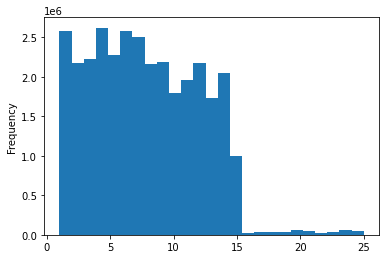

In [30]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

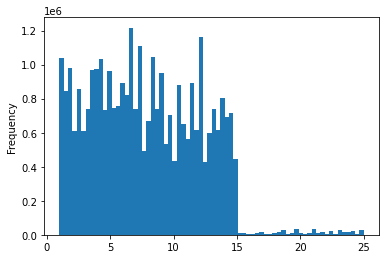

In [31]:
# To increase granularity

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [51]:
# Export the ' hist' object

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '27_07_22', 'hist_prices.png'))

## Creating Line Charts

#### Line charts are to visualize the development of a caracteristic over time. This dataframe has no data that can be used for this purpose, however, a different type of line chart can be tested: development of the 'prices' column across the days of the week. To achieve this, plot 'orders_day_of_week' on the x-axis and the 'prices' on the y-axis.

#### Unless machine has 16 GB RAM, this will cost much time and most likely I'll have to start over. TO avoid this the subsetting method can be used.
#### Despite having the right amount or RAM, this method won't work because it wouldn't be a representation of the entire population. To tackle this problem, we neet to sample--sampling.

## Sampling Data

#### TO make a representative sample of the data, the dataframe can be splitted in two in the following proportions: 80/20 and /or 70/30--this is a standard approach of machine learning, when training a model using 80% of the data to train the algorithm and the remaining 20% to check teh accuracy of the model

#### Creating these sample requires a list of random floating numbers between 0 and 1 (1 representing the 100%), that's as long as the dataframe. This means that '0/7' will be randomly assigned to some rows andthe other numbers or number to the rest of the rows (if the splitted proportion was to be 70/30).

In [38]:
np.random.seed(4)

# Create a list holding Treu/False values to the test np.random.rand() ,= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

#### The 'seed; represents a random but reproducible pattern, that in this case has been set to 4.
#### The seed is set via NumPy function 'random.seed()', that ensures it will use the same random pattern of numbers
#### A list called 'dev' was created with the code above; this list stores the boolean values (if the value is 0.7 then True, else False.

#### The np at the beginning stns for the NumPy library,
#### the 'random' function creates a list of random floating numbers between 0 and 1,
####  the 'rand' function ensure random numbers generated by 'random' function follow the uniform distribution--meanin, ensures there's equal chance for every number between 0 and 1 to occur in the distribution
#### WIthin the parentheses, 'len()' produces a value that represents the length of wahtever it's inside as argument

In [34]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

## Breaking down the code:

#### 1. Set the seed for the random number generator.
#### 2.Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
#### 3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
#### 4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

### How to use the list 'dev' to split the dataframe in two samples?

In [39]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [40]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

#### The division o values between samples  are according to the 'dev' list.
#### For every value that's TRUE, the corresponding row (in 'ords_prods_merge' dataframe) will be stored in 'big' sample, and vice versa fot the False values
#### Since True and False were determined bu whethet or not the random number was less than or greater than 0.7, 70%% of the rows will go to 'big' sample and 30% will go to the 'small' sample.

In [41]:
# Check results
len(ords_prods_merge)

32404859

In [42]:
len(big) + len(small)

32404859

#### The last step would be reducing samples to only those columns I need: 'orders_day_of_week' and 'prices'

In [44]:
# Create a new dataframe that contains only the 'prices' and 'prders_say_of_week' columns from the 'small' subset (sample).
df_2 = small[['order_day_of_week', 'prices']]

In [45]:
# Check 'df_2' dataframe (subset/sample)

df_2.shape

(9721098, 2)

#### Create a chart with the following code:

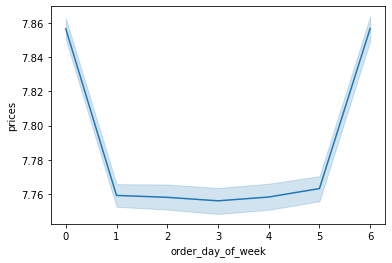

In [46]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [48]:
df_4 = ords_prods_merge[['order_day_of_week', 'prices']]

In [49]:
line_2 = sns.lineplot(df_4, x = 'order_day_of_week', y = 'prices')

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `prices` for parameter `y`

In [52]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '27_07_22', 'line_odow_prices.png'))